In [2]:
import numpy as np
import scipy.integrate as spyint
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


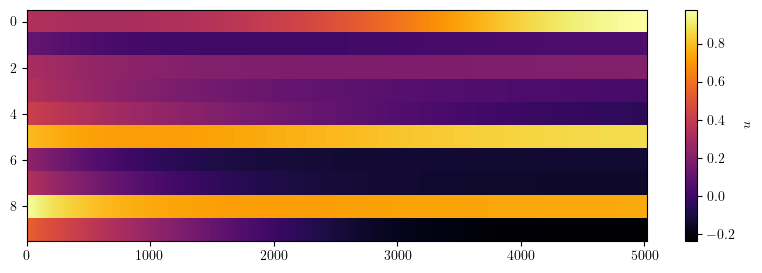

In [32]:

def FHNString(prm):
    # N = y//2
    def core(t, y):
        u = y[:prm['N']]; v = y[prm['N']:]
        dudt = u*(1-u)*(u-prm['a']) - v 
        
        dvdt0 =  prm['D']*(v[1]-v[0]); dvdtn = prm['D']*(v[-2]-v[-1])
        coupling = v[0:-2] + v[2:] - 2*v[1:-1]
        dvdti = prm['e'] *(prm['k']*u[1:-1]  - v[1:-1] -prm['b']) +prm['D']*coupling
        
        # dvdt = np.concatenate([np.array(dvdt0), dvdti, np.array(dvdtn)])
        dvdt = np.hstack(([dvdt0], dvdti, [dvdtn]))
        return np.concatenate([dudt,dvdt])
    
    t_vec = np.linspace(0, prm['tmax'], prm['tn'])
    
    sol = spyint.solve_ivp(core, (t_vec[0], t_vec[-1]), prm['y0'], method='RK45')
    return sol.y, sol.t


prm = {
    'N' : 10,
    'a' : .139, 
    'e' : .1e3, 
    'k' : .6, 
    'b' : .8e-1, 
    'D' : .4e3, 
    'tmax' : 10, 
    'tn' : 10,
    'y0': np.random.uniform(0,1,20),
    # 'y0' : np.zeros(20)
}

ysol, t = FHNString(prm)

plt.figure(figsize=(10, 3))
plt.imshow(ysol[:prm['N']], cmap='inferno', aspect='auto', interpolation='nearest')
cbar = plt.colorbar()   
cbar.set_label('$u$')

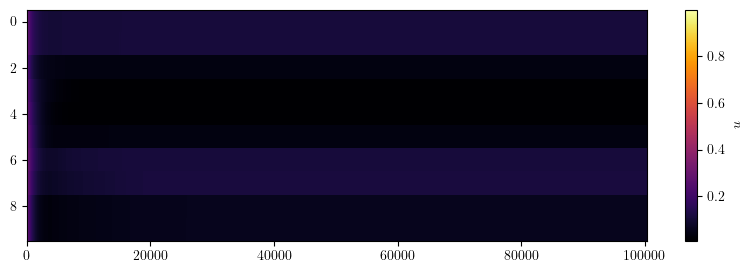

In [31]:

plt.figure(figsize=(10, 3))
plt.imshow(ysol[prm['N']:], cmap='inferno', aspect='auto', interpolation='nearest')
cbar = plt.colorbar()   
cbar.set_label('$u$')